In [ ]:
#Download dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataset=pd.read_csv('train.csv')

print(len(dataset))

print(dataset.shape)



1460
(1460, 81)


In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

print(features_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
for feature in features_with_na:
   print(feature,np.round(dataset[feature].isnull().mean(),4),'%missing values')

LotFrontage 0.1774 %missing values
Alley 0.9377 %missing values
MasVnrType 0.0055 %missing values
MasVnrArea 0.0055 %missing values
BsmtQual 0.0253 %missing values
BsmtCond 0.0253 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.0253 %missing values
BsmtFinType2 0.026 %missing values
FireplaceQu 0.4726 %missing values
GarageType 0.0555 %missing values
GarageYrBlt 0.0555 %missing values
GarageFinish 0.0555 %missing values
GarageQual 0.0555 %missing values
GarageCond 0.0555 %missing values
PoolQC 0.9952 %missing values
Fence 0.8075 %missing values
MiscFeature 0.963 %missing values


In [7]:
print(features_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
for feature in features_with_na:
    data=dataset.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)

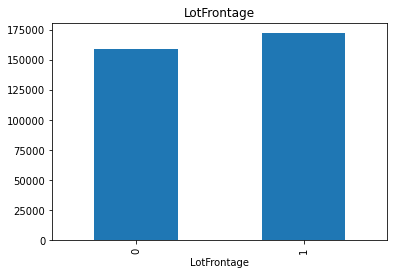

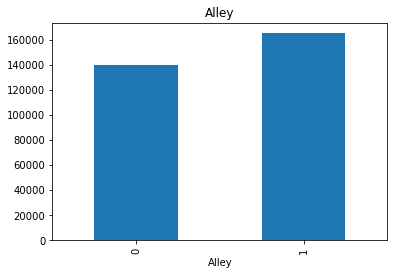

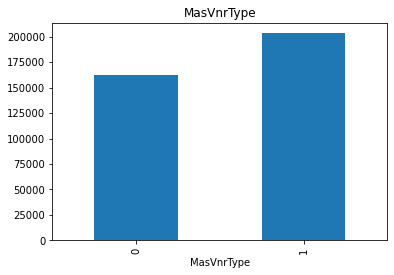

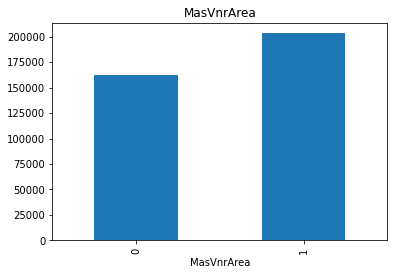

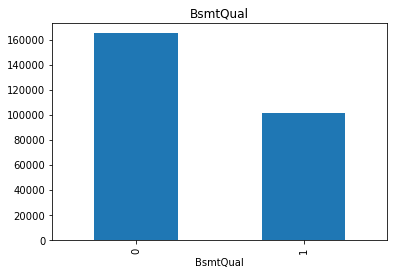

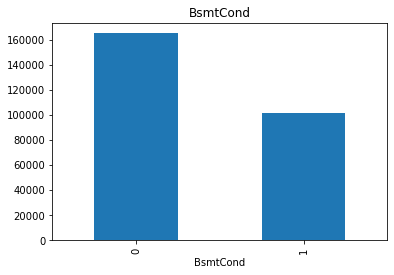

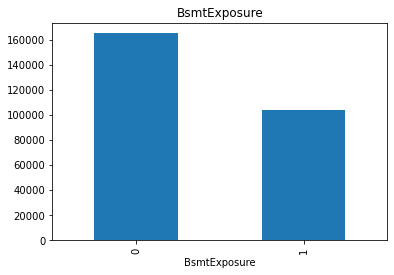

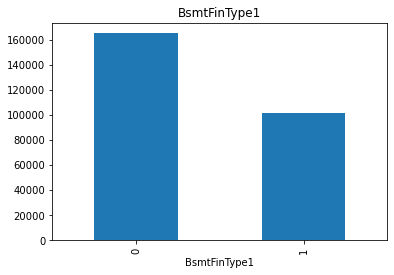

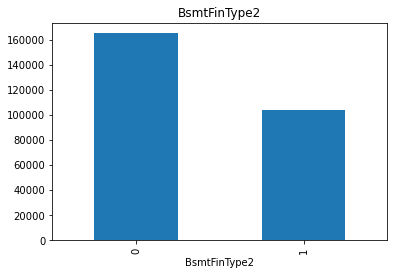

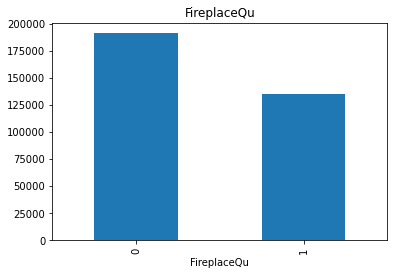

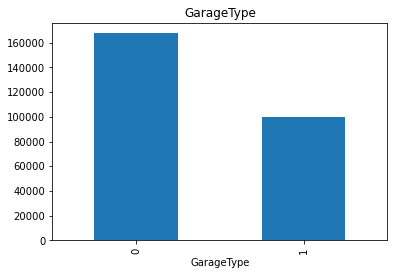

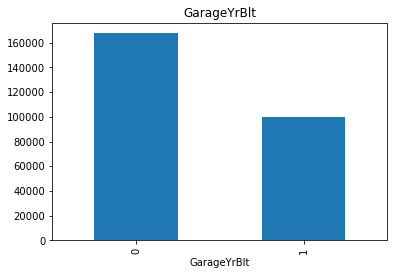

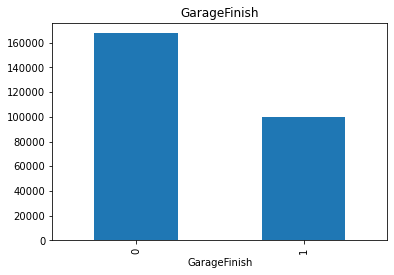

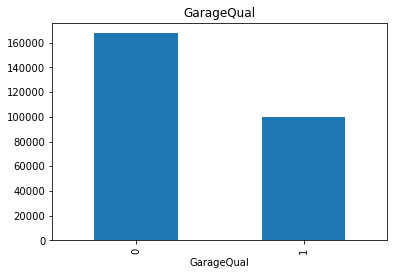

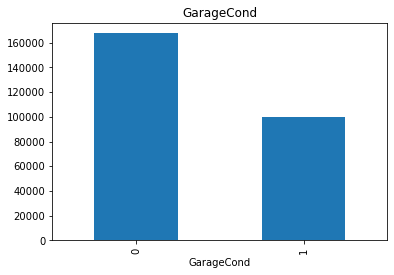

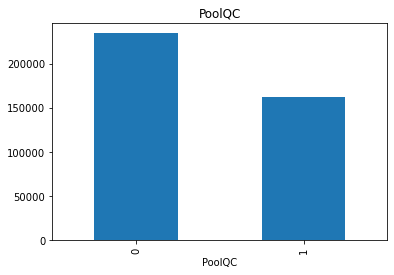

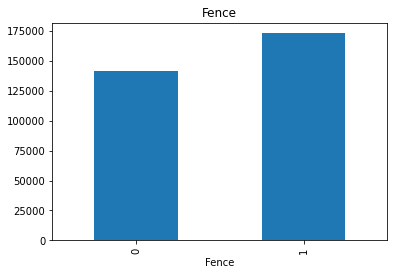

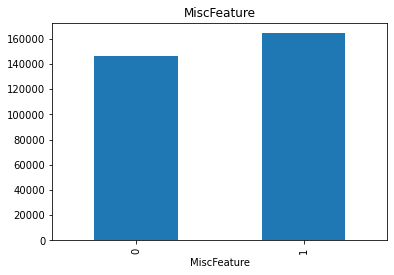

In [9]:

for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    

In [10]:
##Get numeric data

In [11]:
dataset['Alley'].dtypes

dtype('O')

In [12]:
numeric_features=[ feature for feature in dataset.columns if dataset[feature].dtypes!='O']

print(numeric_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [13]:
yearfeatures=[yearfeature for yearfeature in dataset.columns if 'Yr' in yearfeature or 'Year' in yearfeature] 

In [14]:
yearfeatures


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [15]:
for feat in yearfeatures:
    print(feat,dataset[feat].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

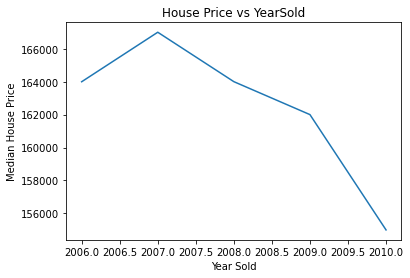

In [16]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [17]:
#discrete and continous variables

discrete_feat=[feature for feature in dataset.columns if len(dataset[feature].unique())<25 ]

discrete_feat

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

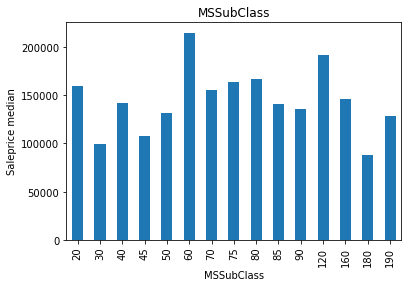

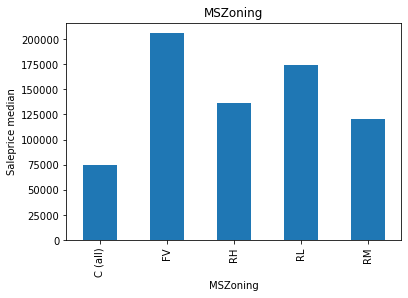

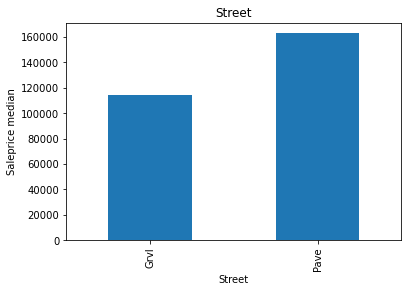

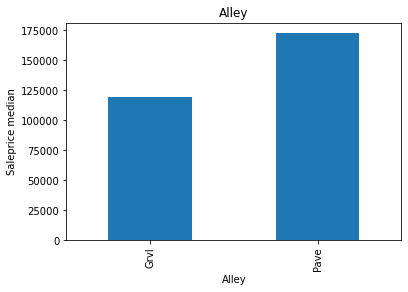

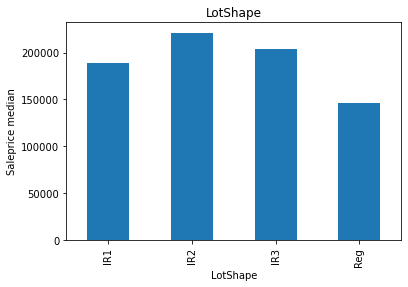

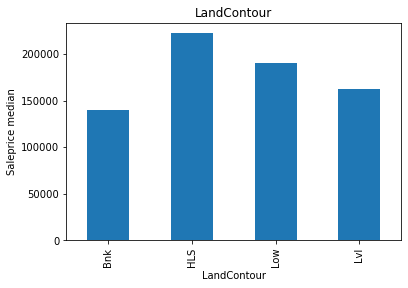

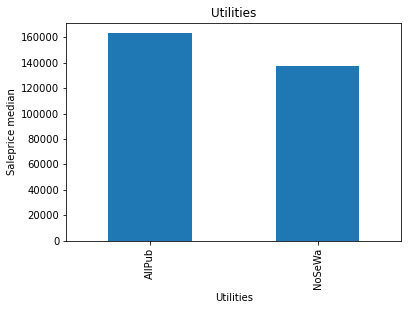

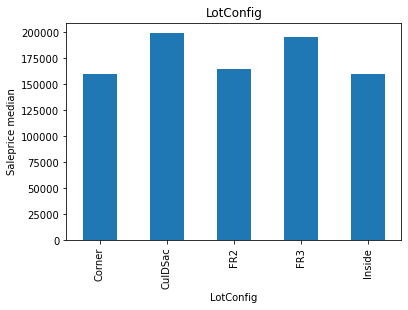

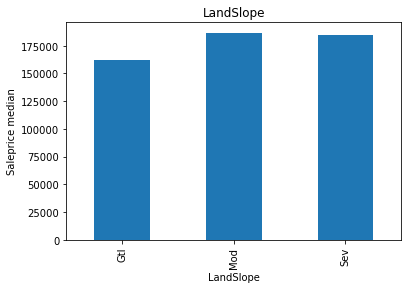

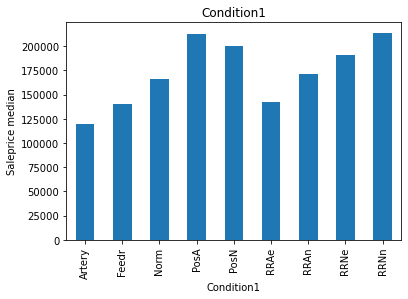

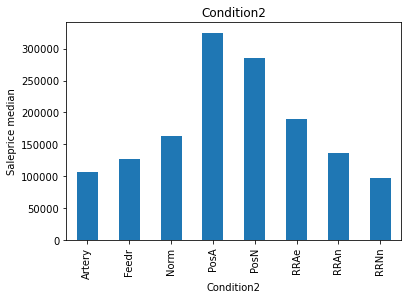

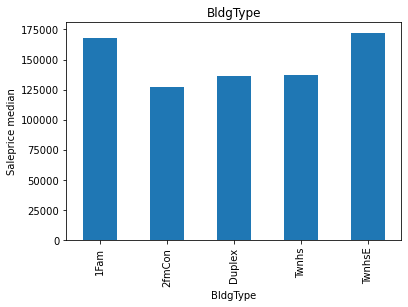

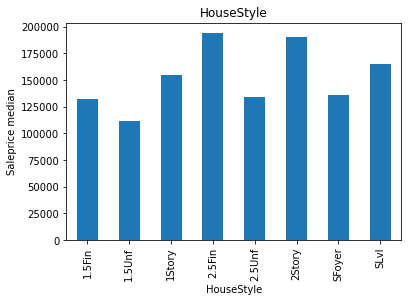

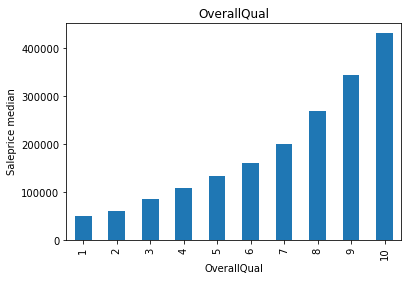

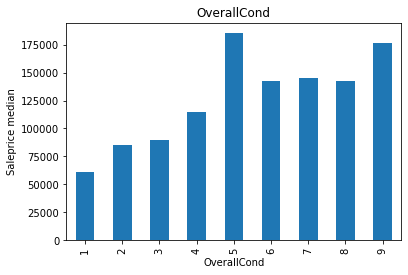

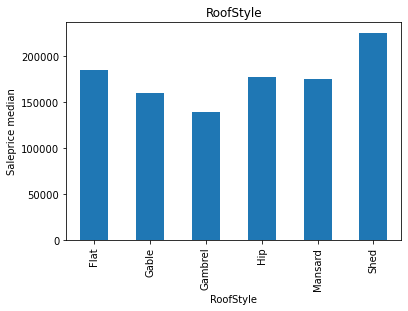

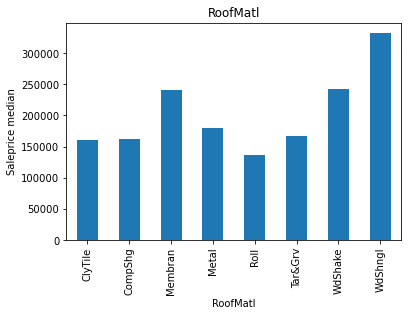

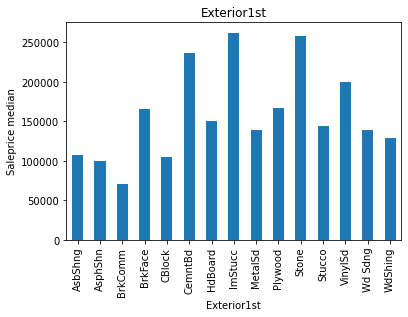

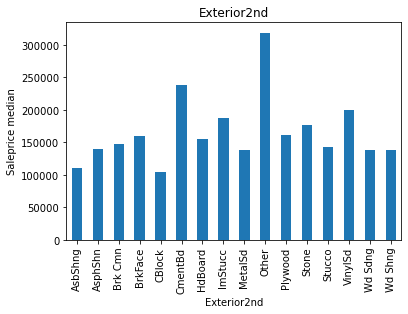

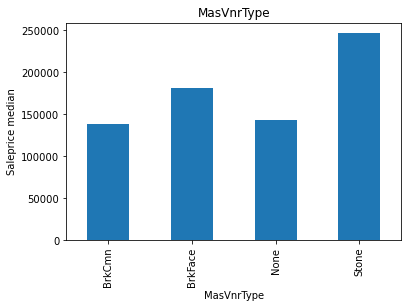

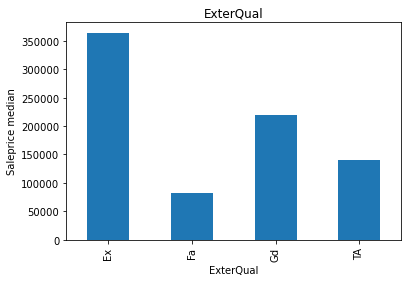

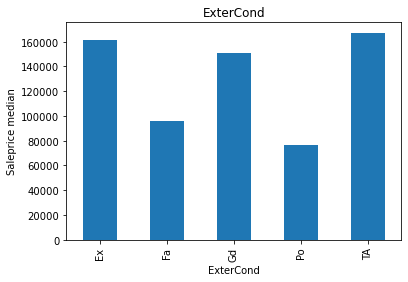

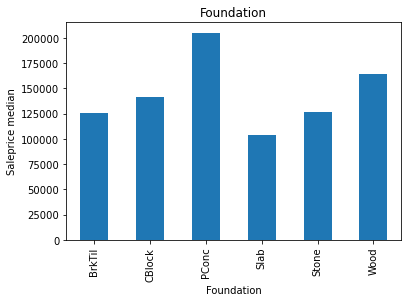

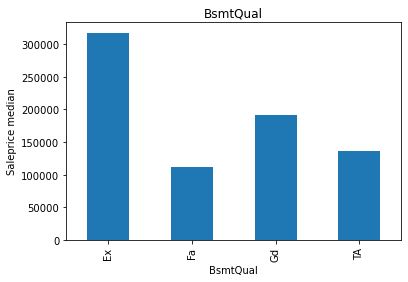

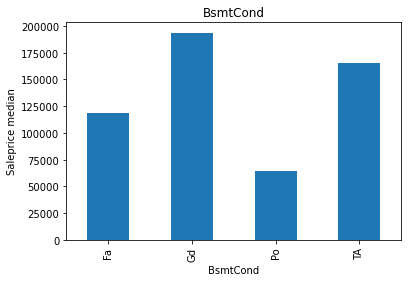

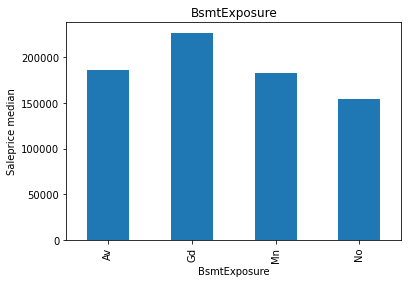

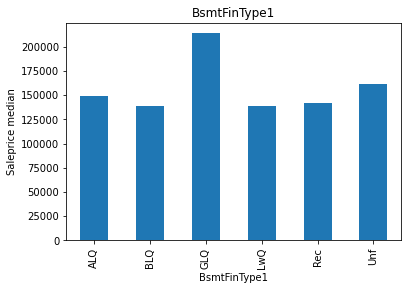

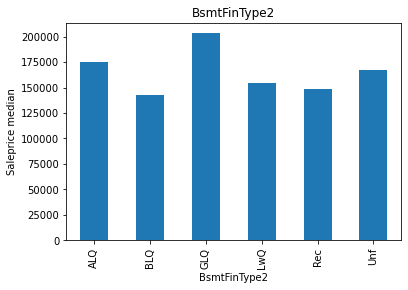

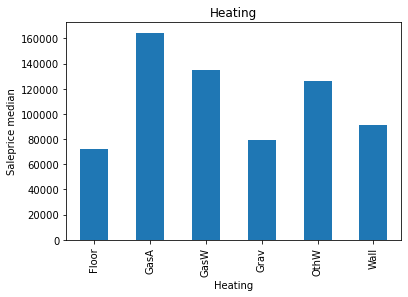

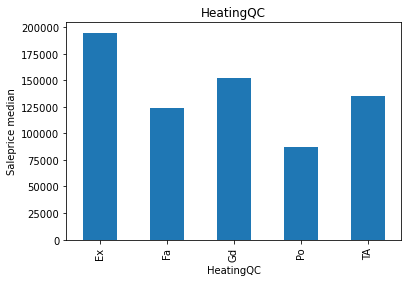

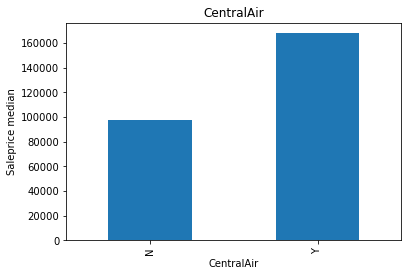

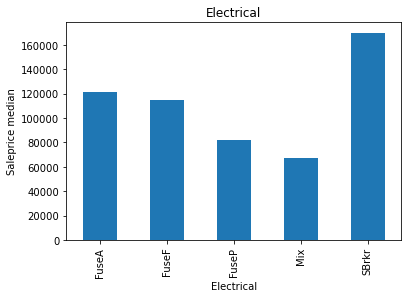

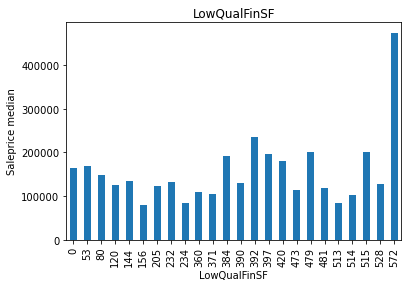

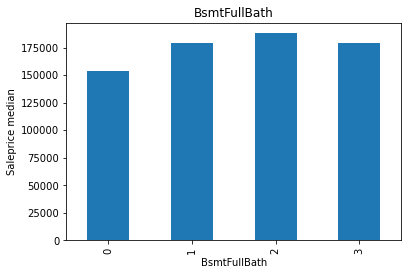

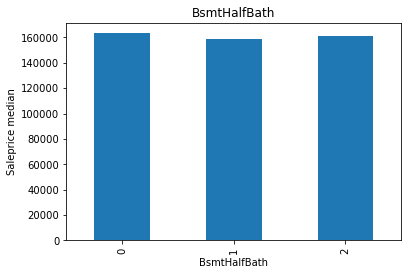

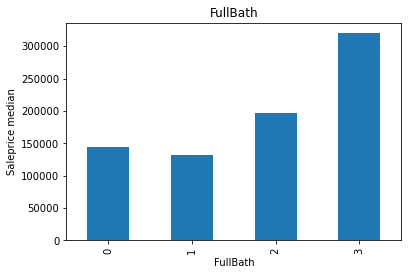

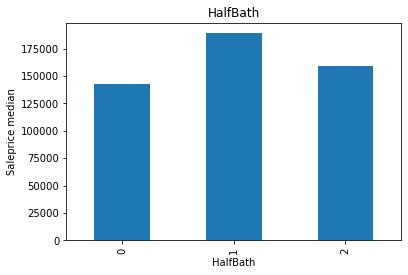

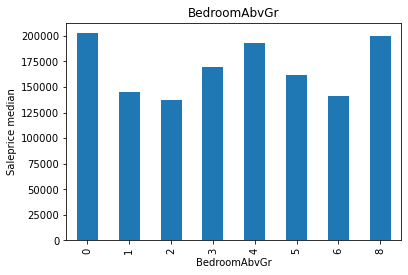

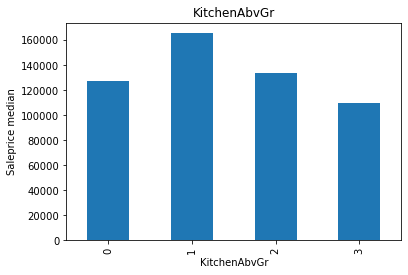

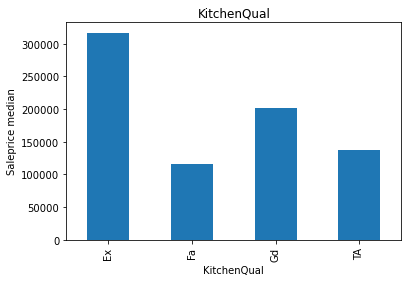

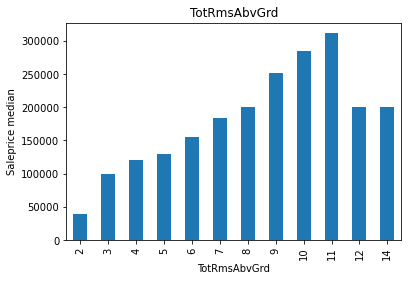

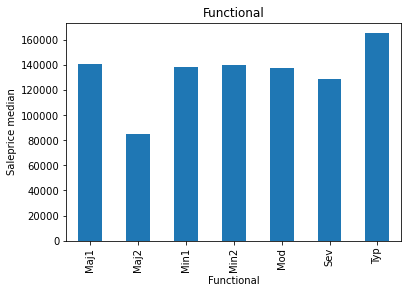

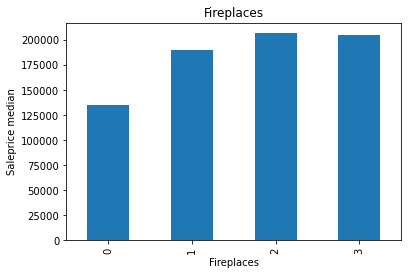

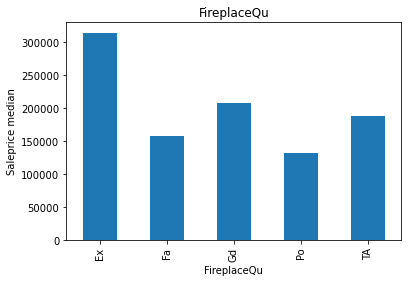

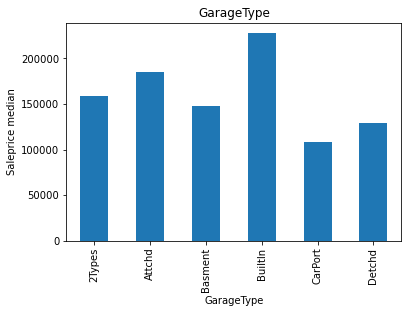

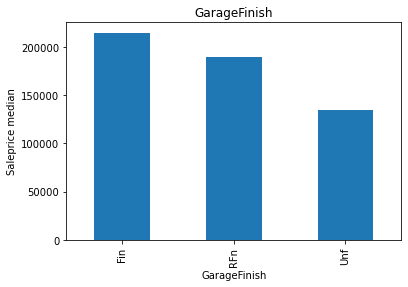

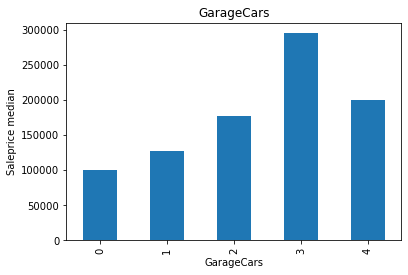

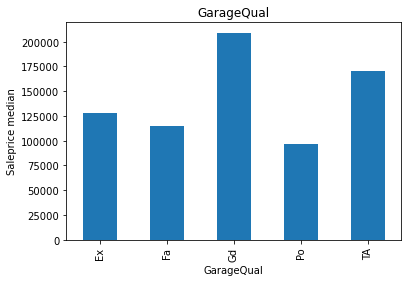

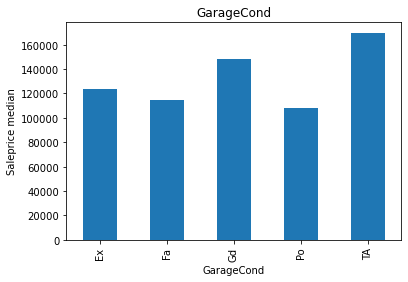

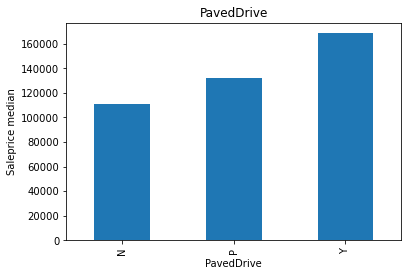

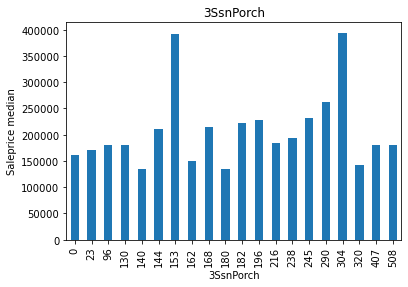

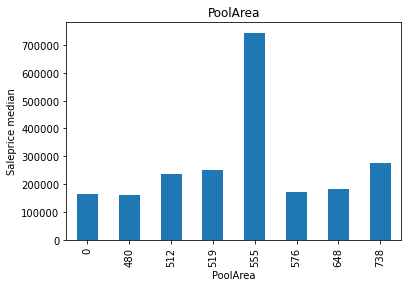

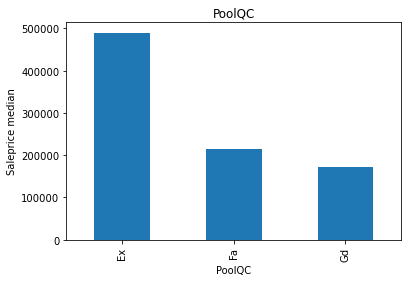

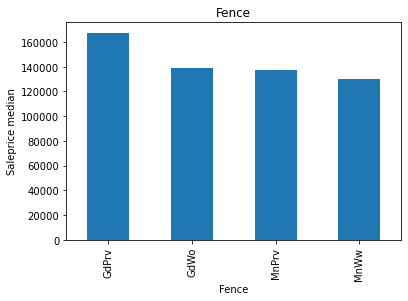

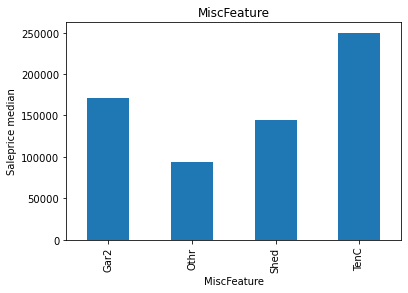

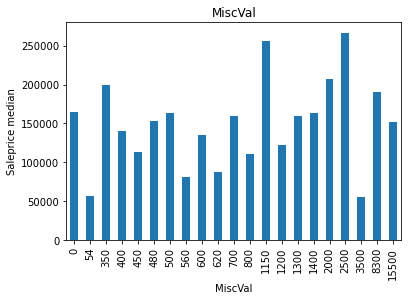

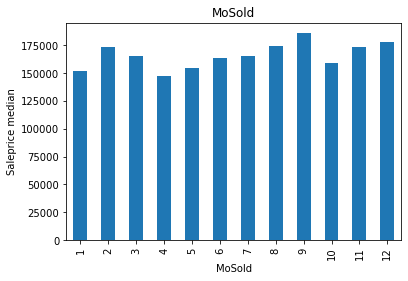

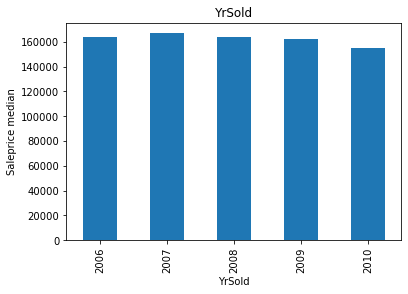

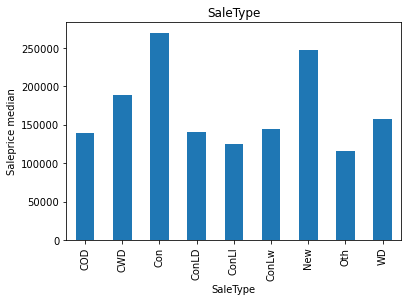

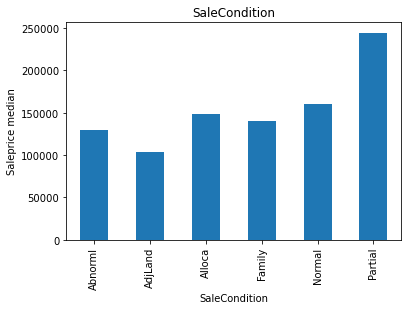

In [18]:
for feature in discrete_feat:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Saleprice median')
    plt.title(feature)
    plt.show()

In [19]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


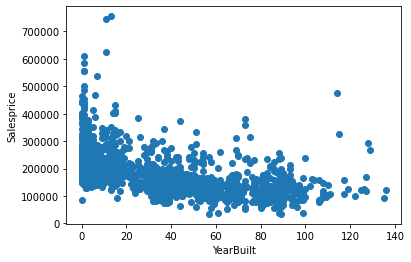

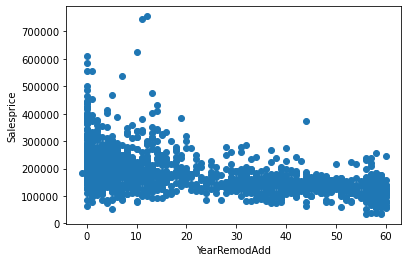

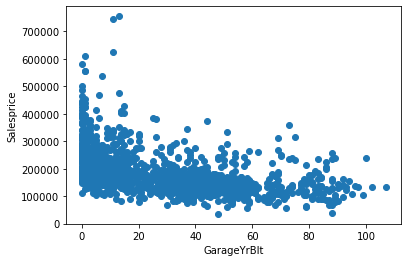

In [36]:
for feature in yearfeatures:
    if feature!='YrSold':
        data=dataset.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Salesprice')
        plt.show()

In [20]:
continous_feature=[i for i in numeric_features if i not in yearfeatures+discrete_feat+['Id']]
print(continous_feature)    
print("Count of continous features:",len(continous_feature))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Count of continous features: 16


In [21]:
dataset[continous_feature]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


NameError: name 'i' is not defined

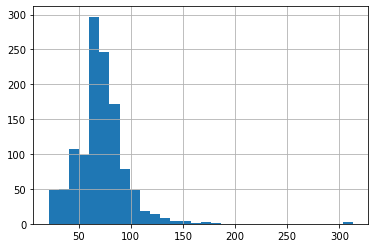

In [22]:
for feature in continous_feature:
    data=dataset.copy()
    data[feature].hist(bins=30)
    plt.xlabel(i)
    plt.ylabel('Saleprice')
    plt.show()

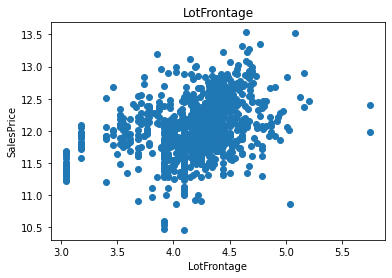

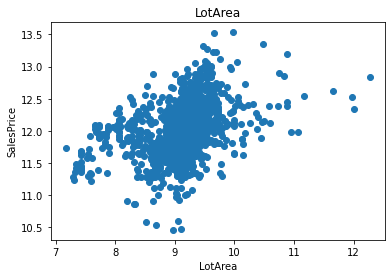

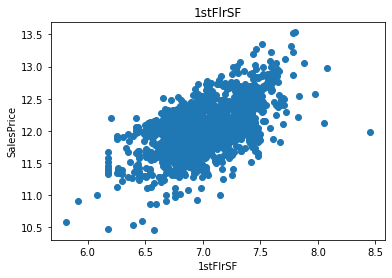

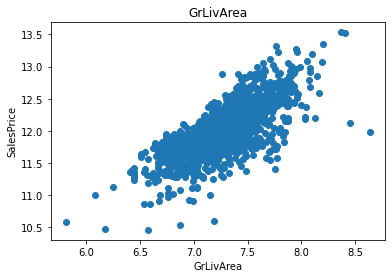

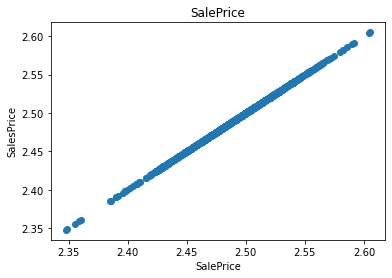

In [23]:
for feature in continous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
       data[feature]=np.log(data[feature])
       data['SalePrice']=np.log(data['SalePrice'])
       plt.scatter(data[feature],data['SalePrice'])
       plt.xlabel(feature)
       plt.ylabel('SalesPrice')
       plt.title(feature)
       plt.show()

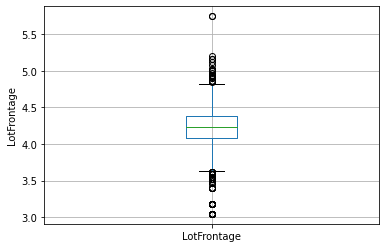

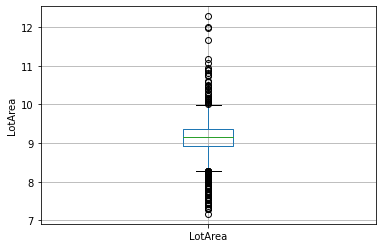

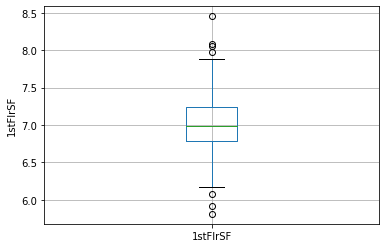

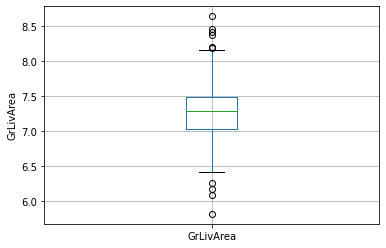

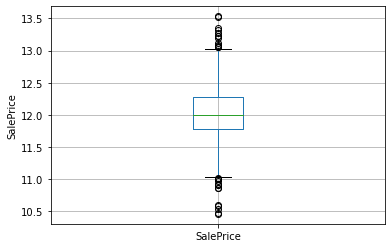

In [24]:
for i in continous_feature:
    data=dataset.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data.boxplot(column=i)
        
        plt.ylabel(i)
        plt.show()

In [25]:
categorical_feature=[feature for feature in data.columns if data[feature].dtypes=='O']

print(categorical_feature)
data[categorical_feature].head()

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [26]:
for feature in categorical_feature:
 print("The categorical feature {} and its count {}".format(feature,len(data[feature].unique())))

The categorical feature MSZoning and its count 5
The categorical feature Street and its count 2
The categorical feature Alley and its count 3
The categorical feature LotShape and its count 4
The categorical feature LandContour and its count 4
The categorical feature Utilities and its count 2
The categorical feature LotConfig and its count 5
The categorical feature LandSlope and its count 3
The categorical feature Neighborhood and its count 25
The categorical feature Condition1 and its count 9
The categorical feature Condition2 and its count 8
The categorical feature BldgType and its count 5
The categorical feature HouseStyle and its count 8
The categorical feature RoofStyle and its count 6
The categorical feature RoofMatl and its count 8
The categorical feature Exterior1st and its count 15
The categorical feature Exterior2nd and its count 16
The categorical feature MasVnrType and its count 5
The categorical feature ExterQual and its count 4
The categorical feature ExterCond and its cou

In [45]:
for feature in categorical_feature:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    
    temp_df=temp[temp>0.01].index
    
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

dataset.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Rare_var,Reg,Lvl,AllPub,...,0,Rare_var,Rare_var,Rare_var,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Rare_var,Reg,Lvl,AllPub,...,0,Rare_var,Rare_var,Rare_var,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Rare_var,IR1,Lvl,AllPub,...,0,Rare_var,Rare_var,Rare_var,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Rare_var,IR1,Lvl,AllPub,...,0,Rare_var,Rare_var,Rare_var,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Rare_var,IR1,Lvl,AllPub,...,0,Rare_var,Rare_var,Rare_var,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Rare_var,IR1,Lvl,AllPub,...,0,Rare_var,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Rare_var,Reg,Lvl,AllPub,...,0,Rare_var,Rare_var,Rare_var,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,Rare_var,IR1,Lvl,AllPub,...,0,Rare_var,Rare_var,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Rare_var,Reg,Lvl,AllPub,...,0,Rare_var,Rare_var,Rare_var,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Rare_var,Reg,Lvl,AllPub,...,0,Rare_var,Rare_var,Rare_var,0,1,2008,WD,Normal,118000
